Big Mart Sales Predication Model

We are going to use Regression as we are going to predict sales of different stores and products.

Regression is supervised learning algorithm which takes the continous values.
eg:salary,age,prices etc.


Work flow:

1) Dataset
2) Data pre processing
3) Data analysis
4) Train Test split
5) XGBoost regressor
6) Evaluation


Importing the dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



Data collection and Analysis


In [2]:
#loading dataset from csv file to pandas dataframe

bg_mart=pd.read_csv('/content/Train-Set.csv')
bg_mart

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
bg_mart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# number of data points and features
# data points-> rows  features->coloumns

bg_mart.shape


(8523, 12)

In [5]:
# getting some information about dataset
bg_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# check for any missing values:
bg_mart.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Handling missing values



1. Mean-> average value -> used for numerical features
2. Mode-> most repeated value -> used for categorical features. 






In [7]:
#mean value of weight column

bg_mart['Weight'].mean()

12.857645184135976

In [8]:
# filling the misssing values in 'weight' column with Mean values
bg_mart['Weight'].fillna(bg_mart['Weight'].mean(),inplace=True)

In [9]:
bg_mart.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [10]:
#mode of "OutletSize"
mode_of_outletSize = bg_mart.pivot_table(values='OutletSize',columns='OutletType',aggfunc=(lambda x:x.mode()[0]))

In [11]:
print(mode_of_outletSize)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [12]:
missing_values = bg_mart['OutletSize'].isnull()

In [13]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool


In [14]:
bg_mart.loc[missing_values,'OutletSize']=bg_mart.loc[missing_values,'OutletType'].apply(lambda x: mode_of_outletSize)

In [15]:
bg_mart.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

Data analysis


In [16]:
# statistical measures only for numerical values
bg_mart.describe()


,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features


In [17]:
sns.set()

<ipython-input-18-ff29f944c957>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_mart['Weight'])


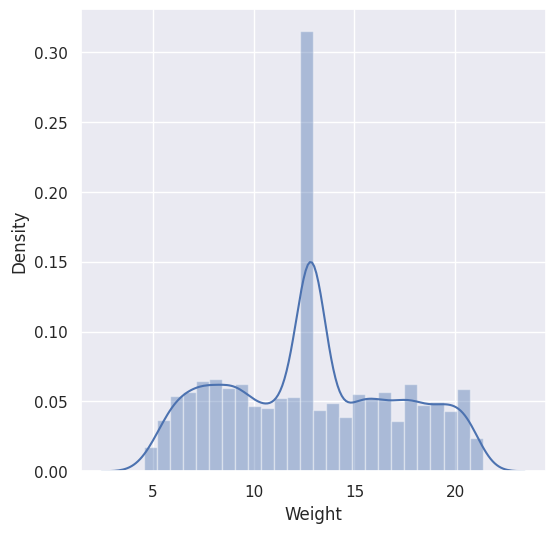

In [18]:
# weight distribution
plt.figure(figsize=(6,6))
sns.distplot(bg_mart['Weight'])
plt.show()

<ipython-input-19-916471a15f64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_mart['ProductVisibility'])


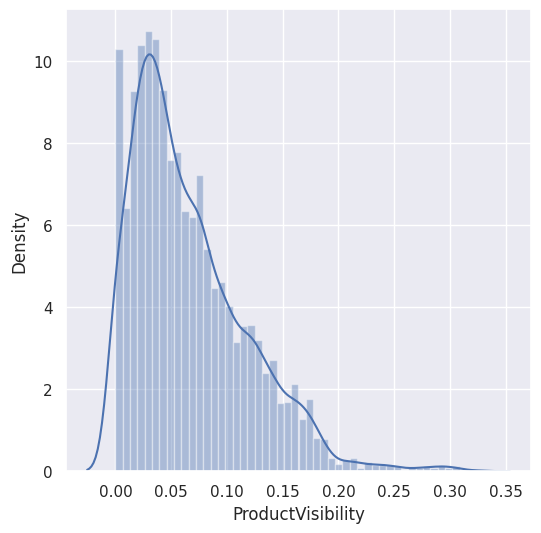

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(bg_mart['ProductVisibility'])
plt.show()

<ipython-input-20-bd7d13b94e8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_mart['MRP'])


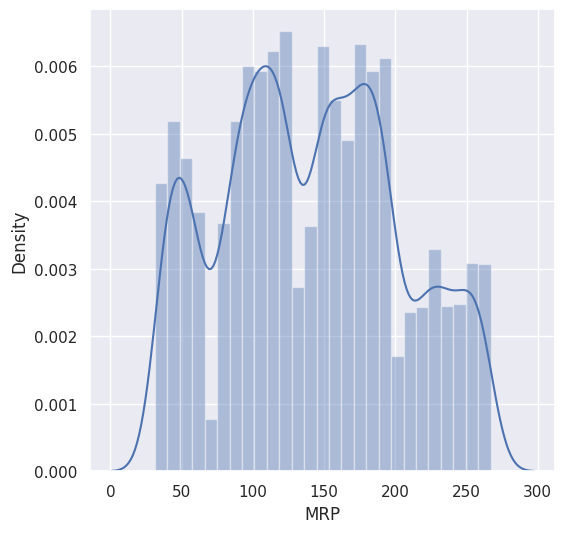

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(bg_mart['MRP'])
plt.show()

<ipython-input-21-f93a852c0161>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_mart['OutletSales'])


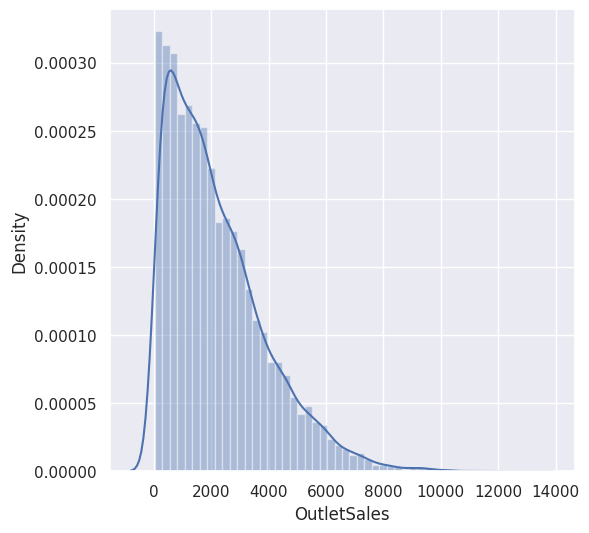

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(bg_mart['OutletSales'])
plt.show()

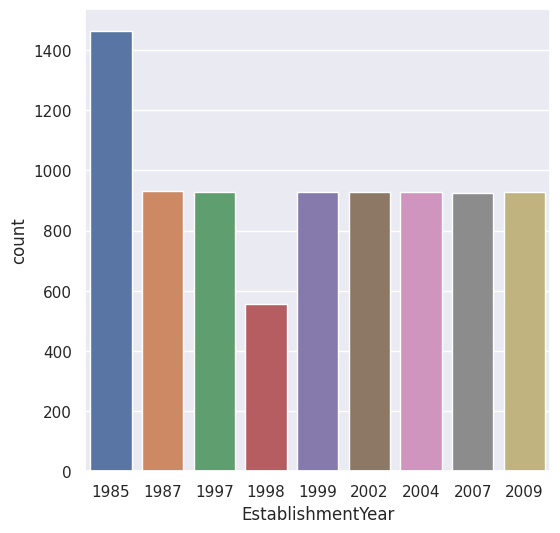

In [22]:
#EstablishmentYear
plt.figure(figsize=(6,6))
sns.countplot(x='EstablishmentYear',data=bg_mart)
plt.show()

Categorical Features


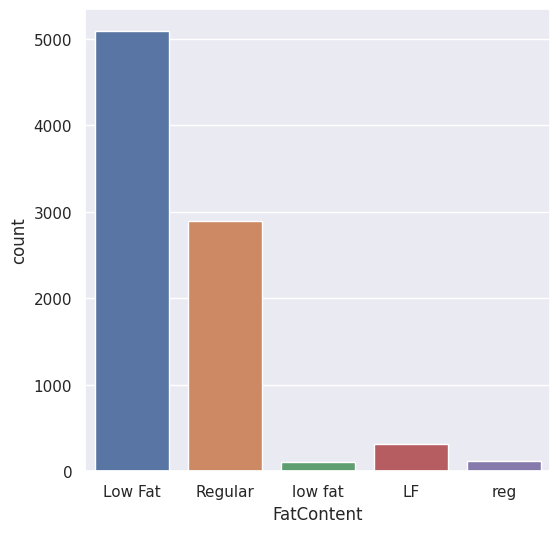

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='FatContent',data=bg_mart)
plt.show()

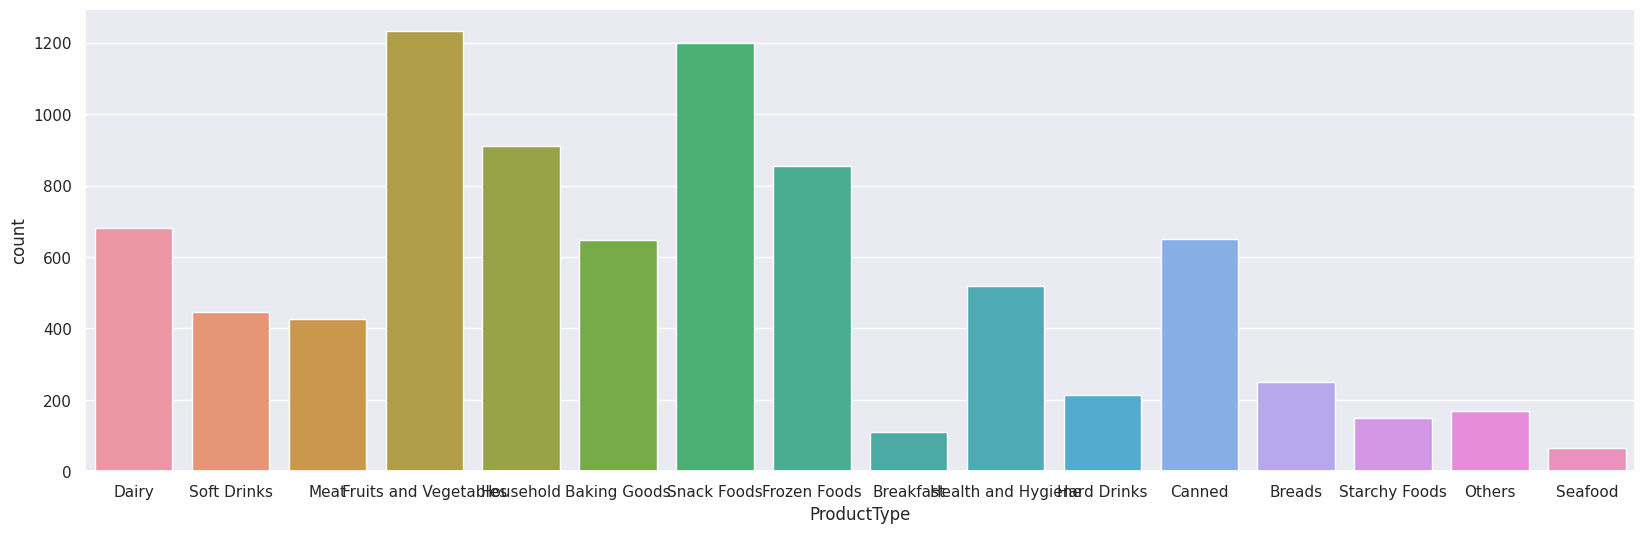

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x='ProductType',data=bg_mart)
plt.show()

Data pre processing

In [31]:
bg_mart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,OutletType Grocery Store Supermarket Type1 Sup...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
bg_mart['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [34]:
bg_mart.replace({'FatContent':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [35]:
bg_mart['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

Label encoding


In [36]:
encoder = LabelEncoder()

In [42]:
bg_mart['FatContent'] = encoder.fit_transform(bg_mart['FatContent'])
bg_mart['ProductType'] = encoder.fit_transform(bg_mart['ProductType'])

bg_mart['LocationType'] = encoder.fit_transform(bg_mart['LocationType'])
bg_mart['OutletType'] = encoder.fit_transform(bg_mart['OutletType'])
bg_mart['OutletID'] = encoder.fit_transform(bg_mart['OutletID'])
bg_mart['ProductID'] = encoder.fit_transform(bg_mart['ProductID'])

In [43]:
bg_mart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,OutletType Grocery Store Supermarket Type1 Sup...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


Splitting features and target

In [59]:
bg_mart.drop(['OutletSize'],axis=1,inplace=True)

In [60]:
X=bg_mart.drop(columns='OutletSales',axis=1)
y=bg_mart["OutletSales"]

In [61]:
print(X)

      ProductID  Weight  FatContent  ProductVisibility  ProductType       MRP  \
0           156   9.300           0           0.016047            4  249.8092   
1             8   5.920           1           0.019278           14   48.2692   
2           662  17.500           0           0.016760           10  141.6180   
3          1121  19.200           1           0.000000            6  182.0950   
4          1297   8.930           0           0.000000            9   53.8614   
...         ...     ...         ...                ...          ...       ...   
8518        370   6.865           0           0.056783           13  214.5218   
8519        897   8.380           1           0.046982            0  108.1570   
8520       1357  10.600           0           0.035186            8   85.1224   
8521        681   7.210           1           0.145221           13  103.1332   
8522         50  14.800           0           0.044878           14   75.4670   

      OutletID  Establishme

In [62]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64


Splitting the data into trainning data and test data

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


XGBoost Regressor

In [64]:
model = XGBRegressor(n_estimators = 750,learning_rate = 0.007)

In [65]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.007, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
train_data_prediction = model.predict(X_train)

In [67]:
r2_train = metrics.r2_score(y_train,train_data_prediction)
print("R Squared Value : ",r2_train)

R Squared Value :  0.6883212650512354


In [68]:
# test data prediction
test_data_prediction = model.predict(X_test)

In [69]:
r2_test = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Value : ",r2_test)

R Squared Value :  0.5779575722051835


In [70]:
bg_mart = pd.read_csv("/content/Test-Set.csv")

# Getting top 5 rows 
bg_mart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [72]:
bg_mart.shape

(5681, 11)

In [73]:
bg_mart.isnull().sum()

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [74]:
# Mean Value
bg_mart["Weight"].fillna(bg_mart["Weight"].mean(),inplace=True)
bg_mart.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [75]:
bg_mart.drop(['OutletSize'],axis=1,inplace=True)

In [76]:
bg_mart.isnull().sum()


ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
LocationType         0
OutletType           0
dtype: int64

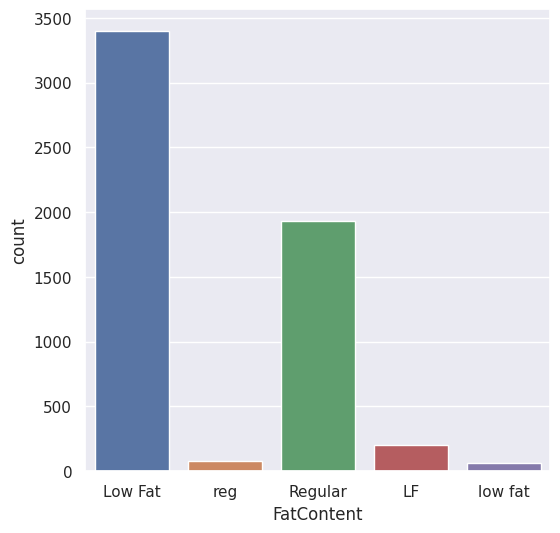

In [78]:
# FatContent
plt.figure(figsize = (6,6))
sns.countplot(x ='FatContent',data = bg_mart)
plt.show()

In [79]:
bg_mart.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
bg_mart['FatContent'].value_counts()

Low Fat    3668
Regular    2013
Name: FatContent, dtype: int64

In [80]:
bg_mart['FatContent'] = encoder.fit_transform(bg_mart['FatContent'])
bg_mart['ProductType'] = encoder.fit_transform(bg_mart['ProductType'])

bg_mart['LocationType'] = encoder.fit_transform(bg_mart['LocationType'])
bg_mart['OutletType'] = encoder.fit_transform(bg_mart['OutletType'])
bg_mart['OutletID'] = encoder.fit_transform(bg_mart['OutletID'])
bg_mart['ProductID'] = encoder.fit_transform(bg_mart['ProductID'])

In [81]:
model.fit(X,y)
test_predictions = model.predict(bg_mart)
print(test_predictions)

[1569.255   1335.311    668.18036 ... 1869.8331  3653.0867  1294.26   ]


In [82]:
# converting array into dataframe
OutletSales = test_predictions 
df = pd.DataFrame(OutletSales, columns = ['OutletSales'])

In [83]:
bg_mart['OutletSales'] = OutletSales
bg_mart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,LocationType,OutletType,OutletSales
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,0,1,1569.255005
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1335.311035
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,0,668.180359
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,2421.606445
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,2,3,6254.655273
